This notebook shows how to draw band structure plot from a `vasprun.xml` file by `mykit`.

We of course need to import the `Vasprunxml` class. 
To draw the band structure diagram, we need to use the `BSVisualizer` class in the `visualizer` module. 
A convenience function `init` from `visualizer` is provided to get a `BSVisualizer` instance for plotting.

In [1]:
from mykit.visualizer import init
from mykit.vasp.xml import Vasprunxml

In [2]:
# first load the band structure from a vasprun.xml file
vxml = Vasprunxml('vasprun.xml_TiO2_band')
bs = vxml.load_band()

Plot a TiO2 band structure with wave projections of highest valence band on Ti 3d and lowest conduction band on O 2p.

- `align_vbm` keyword is set as True to make the valence band maximum as energy zero.
- `proj_style` is set to `'dot'` to draw the projections as scattered points, whose areas are proportional to the projections. `'stripe'` is also acceptable, in which case a striped below the band will be drawn with widths proportional to the projectionos

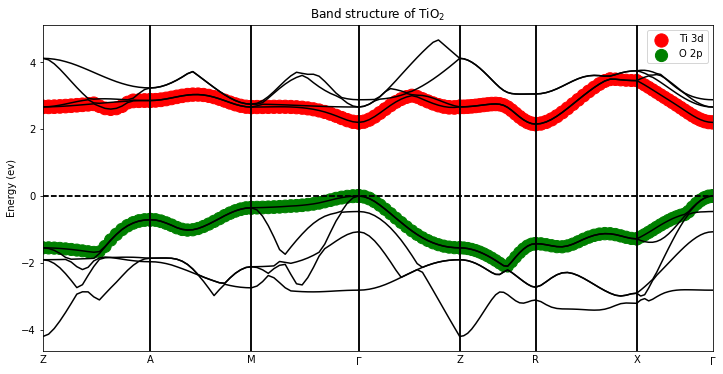

In [3]:
%matplotlib inline
# initialize the band structure visualizer by init
v = init(bs, align_vbm=True, proj_style='dot', \
         figsize=(12,6))
# draw first 5 VBs and 5 CBs only
vbs = ['vbm',] + ['vbm-%d'%i for i in range(1,5)]
cbs = ['cbm',] + ['cbm+%d'%i for i in range(1,5)]
v.draw(*vbs)
v.draw(*cbs)
# draw the projections of cbm on Ti 3d and vbm on O 2p
v.draw_proj('Ti', (4, 5, 6, 7, 8), 'cbm', color="red", label="Ti 3d")
v.draw_proj('O', (1, 2, 3), 'vbm', color="green", label="O 2p")
# parse the kpath string to mark the symbols of special kpoints on the graph
# should be consistent with the KPOINTS file used in calculation
v.mark_ksymbols("Z-A-M-GM-Z-R-X-GM")
# set the title
v.set_title("Band structure of TiO${}_2$")
# view the plot
v.show()

It is also possible to draw density of states (DOS) and projected DOS along with band structure. First get a `Dos` object from xml data.

In [4]:
dos = vxml.load_dos()

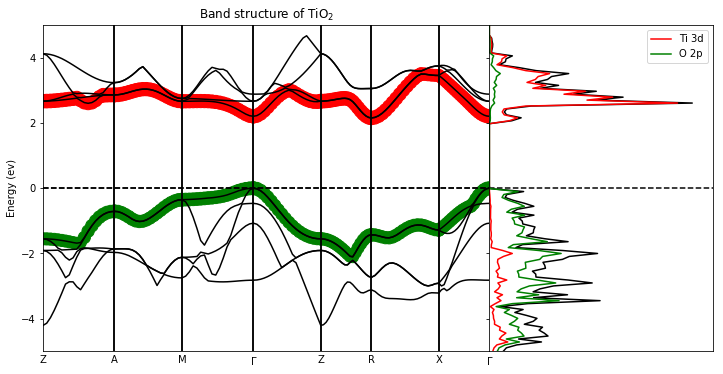

In [5]:
# basically follow the same as above
# the only difference is the keyword argument dos
%matplotlib inline

v = init(bs, align_vbm=True, proj_style='dot', dos=dos, \
         figsize=(12,6))
v.draw(*vbs)
v.draw(*cbs)
v.draw_proj('Ti', (4, 5, 6, 7, 8), 'cbm', color="red", label="Ti 3d")
v.draw_proj('O', (1, 2, 3), 'vbm', color="green", label="O 2p")
v.mark_ksymbols("Z-A-M-GM-Z-R-X-GM")
v.set_title("Band structure of TiO${}_2$")
# set the energy limit
v.set_elim(-5, 5)
v.show()